In [1]:
import pandas as pd
from sklearn import tree

# 1. Mantiksal kapilar

Asagidaki mantiksal kapilari modelleyebilecek karar agaclarini egitiniz.

## 1.a. AND Gate

`AND` kapisinin dogruluk tablosu icin [bu adresteki](https://en.wikipedia.org/wiki/AND_gate) bilgiye bakabilirsiniz.

### 1.a.I



AND dogruluk tablosunu `pandas.DataFrame` olarak tanimlayiniz.



| $x_1$ | $x_2$ | $y$ |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

### 1.a.II

Tanimlamis oldugunuz dogruluk tablosunu kullanarak ve uygun karar agaci modelini secerek (regresyon/tasniflendirme) karar agacinizi egitiniz.

### 1.a.III

Karar agacinizin dogru calistigini test ediniz.

## 1.b. OR Gate

`OR` kapisinin dogruluk tablosu icin [bu adresteki](https://en.wikipedia.org/wiki/OR_gate) bilgiye bakabilirsiniz.

### 1.b.I



OR dogruluk tablosunu `pandas.DataFrame` olarak tanimlayiniz.



| $x_1$ | $x_2$ | $y$ |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

### 1.b.II

Tanimlamis oldugunuz dogruluk tablosunu kullanarak ve uygun karar agaci modelini secerek (regresyon/tasniflendirme) karar agacinizi egitiniz.

### 1.b.III

Karar agacinizin dogru calistigini test ediniz.

## 1.c. XOR Gate

`XOR` kapisinin dogruluk tablosu icin [bu adresteki](https://en.wikipedia.org/wiki/XOR_gate) bilgiye bakabilirsiniz.

### 1.c.I

`XOR` dogruluk tablosunu `pandas.DataFrame` olarak tanimlayiniz.

| $x_1$ | $x_2$ | $y$ |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

### 1.c.II

Tanimlamis oldugunuz dogruluk tablosunu kullanarak ve uygun karar agaci modelini secerek (regresyon/tasniflendirme) karar agacinizi egitiniz.

### 1.c.III

Karar agacinizin dogru calistigini test ediniz.

### 1.c.IV

Karar agacinizi gorsellestiriniz.

# 2. Karar sinirlari

## 2.a Veri seti olusturulmasi

Asagida `make_classification` fonksiyonu kullanilarak iki boyutlu bir veri seti olusturulmustur.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=0)

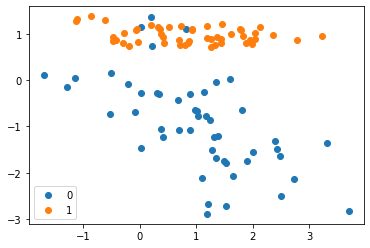

In [4]:
for i in range(2):
    plt.scatter(*X[y==i].T, label=i)
plt.legend()

## 2.b Modelleme

Sekildeki veri, karar agaci kullanilarak modellenmek istenmektedir.

### 2.b.I

Bu bir tasniflendirme problemi midir, yoksa regresyon problemi midir?

### 2.b.II

Herhangi bir kisitlamaya tabi tutmadan, uygun karar agaci modelini (tasniflendirme/regresyon) secerek karar agacinizi egitiniz.

### 2.b.III


Modelinizin kararlarini $x \in [-2, 4]$, $y \in [-4, 2]$ araliginda gorsellestiriniz.


## 2.c. Budama

Asagidaki sorulari, yukarida egitmis oldugunuz karar agacini baz alarak cevaplayiniz.

### 2.c.I

Karar agacinda kullanilabilecek budama tekniklerinden 3 tanesini yaziniz ve calisma prensiplerini kisaca aciklayiniz.

### 2.c.II

Maksimum derinligi `3` e kisitlayarak karar agacinizi tekrar egitiniz. Tahminlerinizi gorsellestiriniz.

### 2.c.III

Maksimum yaprak sayisini `6`'ya kisitlayarak karar agacinizi tekrar egitiniz. Tahminlerinizi gorsellestiriniz.

# 3. Parametre ayarlama

Ogrenilmeyip bastan secilmesi gereken parametrelerin optimizasyonu *(hyperparameter tuning)*, model egitiminin onemli bir parcasidir.

Bu kisimda `sklearn`'un `model_selection` modulunu kullanarak en iyi parametreleri arayacagiz ve bu asamada elde ettigimiz sonuclari gorsellestirecegiz.

## 3.a. Grid Search

`model_selection.GridSearchCV` sinifi, verilen parametrelerin tum kombinasyonlari ile modelin egitim ve degerlendirmesini gerceklestirip en iyi modeli secer.

Ornek bir uygulama:

Modelin ayarlanabilir parametreleri:

In [8]:
from sklearn import tree, model_selection
tree.DecisionTreeClassifier._get_param_names()

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

Parametre gridinin belirlenmesi:

In [9]:
parametre_gridi = {'max_depth':[2,3, None], 'min_samples_split':[2,3,4]}

`GridSearchCV` nesnesinin olusumu:

In [12]:
gs = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), parametre_gridi, cv=10, return_train_score=True)

Aramanin icrasi:

In [13]:
gs.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, None],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True)

Sonuclar:

In [21]:
pd.DataFrame(gs.cv_results_)[['param_max_depth', 'param_min_samples_split', 'mean_train_score', 'mean_test_score']]

,param_max_depth,param_min_samples_split,mean_train_score,mean_test_score
0,2,2,0.960000,0.95
1,2,3,0.960000,0.95
2,2,4,0.960000,0.95
3,3,2,0.971111,0.92
4,3,3,0.967778,0.92
5,3,4,0.967778,0.92
6,None,2,1.000000,0.92
7,None,3,0.991111,0.91
8,None,4,0.978889,0.92


Arama sonucunda en iyi test skorunu veren model, tum veri uzerinde tekrar egitilir (ayri bir egitim sureci gerekmez).

`GridSearchCV` nesnesi tipki bir model nesnesi gibi davranir:

In [22]:
gs.score(X, y)

0.96

In [23]:
gs.predict([[2, 2]])

array([0])

### 3.a.I

`{'max_depth':[2,3,4,5,6,7,8,9,10,None], 'min_samples_split':[2,3,4,5,6,7,8,9,10]}` gridi icin GridSearchCV nesnesi kullanarak modeli degerlendiriniz.

Train ve test sonuclarini *heatmap* ile gorsellestiriniz.

### 3.a.II

Hazirlamis oldugunuz gorselin sonucunu degerlendiriniz.

- Egitim skoru hangi yonlerde artmaktadir? Neden?
- Test skoru nasil bir patern izlemektedir? Sabit bir artis yonu var midir?